# Bias in the median PSD estimate

The median estimate is widely used as it is more robust to large outliers than the mean.

However, the 

In [1]:
%pylab inline

from scipy.signal.spectral import _median_bias
from scipy.stats import chi2

Populating the interactive namespace from numpy and matplotlib


In [2]:
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Computer Modern Roman"
mpl.rcParams["font.size"] = 20
mpl.rcParams["text.usetex"] = True
mpl.rcParams["grid.alpha"] = 0

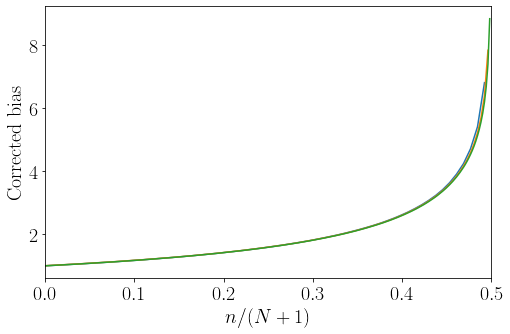

In [5]:
plt.figure(figsize=(8, 5))
for ii in np.arange(7, 10):
    n_average = 2 ** ii - 1
    samples = chi2(2).rvs((10000, n_average))

    values = list()
    for jj in range(2 ** (ii - 1)):
        sorted_samples = np.sort(samples[:, jj:], axis=-1)
        values.append(np.mean(sorted_samples[:, n_average // 2]) / 2 / _median_bias(n_average))
    plt.plot(np.arange(len(values)) / (n_average + 1), values)

plt.xlim(0, 2 ** -1)
plt.ylim(1, max(values))
plt.xlabel("$n / (N + 1)$")
plt.ylabel("Corrected bias")
plt.show()
plt.close()